In [18]:
import skimage
import os
import cv2
import glob
import numpy as np
test_dir = ".\\data\\ffhq\\generated_img\\conditioned_img\\"
baseline_dir = ".\\data\\ffhq\\generated_img\\BL\\"
cascade_dir = ".\\data\\ffhq\\generated_img\\SS\\"

def sort_by_number_ending(lst): # credit chatGPT
    return sorted(lst, key=lambda x: int(x[:-4].split("-")[-1]))
original_imgs = sort_by_number_ending(glob.glob(os.path.join(test_dir, "origin*.png")))
baseline_imgs = sort_by_number_ending(os.listdir(baseline_dir)) # BL: Basline (32->256)
cascade_imgs = sort_by_number_ending(os.listdir(cascade_dir)) # SS: Second stage
# skimage.measure.compare_psnr(*im_true*, *im_test*, *data_range=None*)

# skimage.measure.compare_ssim(X, Y, win_size=None, gradient=False, data_range=None, multichannel=False, gaussian_weights=False, full=False, **kwargs)

In [10]:
# Calculate BL PSNR and SSIM
psnrs_BL = np.array([])
ssims_BL = np.array([])
for idx, img in enumerate(original_imgs):
    input_img_path = img
    test_img_path = os.path.join(baseline_dir, baseline_imgs[idx])
    # print(input_img_path)
    # print(test_img_path)
    input_img = cv2.imread(input_img_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    psnr = skimage.metrics.peak_signal_noise_ratio(input_img, test_img, data_range=255)
    psnrs_BL = np.append(psnrs_BL, psnr)
    ssim = skimage.metrics.structural_similarity(input_img, test_img, data_range=255, multichannel=True)
    ssims_BL = np.append(ssims_BL, ssim)
print("Average of psnrs in baseline 32->256 is", np.average(psnrs_BL))
print("Stadard Deviation of psnrs in baseline 32->256 is", np.std(psnrs_BL))
print("Average of ssims in baseline 32->256 is", np.average(ssims_BL))
print("Stadard Deviation of ssims in baseline 32->256 is", np.std(ssims_BL))

C:\Users\cj020\AppData\Local\Temp\ipykernel_40000\1600199331.py:15: FutureWarning:

`multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.



Average of psnrs in baseline 32->256 is 20.593313653670783
Average of ssims in baseline 32->256 is 0.5700240100598956


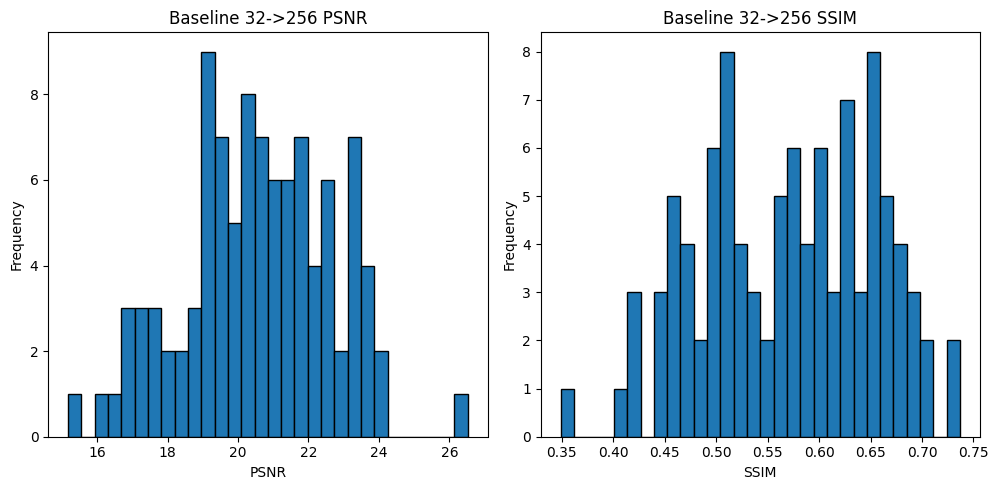

Average of psnrs in baseline 32->256 is 20.593313653670783
Stadard Deviation of psnrs in baseline 32->256 is 2.0756829479348426
Average of ssims in baseline 32->256 is 0.5700240100598956
Stadard Deviation of ssims in baseline 32->256 is 0.08466617908058721


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# generate data for histogram
# data = np.random.normal(100, 20, 1000)

# create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot the first histogram
ax[0].hist(psnrs_BL, bins=30, edgecolor='black')
ax[0].set_xlabel('PSNR')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Baseline 32->256 PSNR')

# plot the second histogram
ax[1].hist(ssims_BL, bins=30, edgecolor='black')
ax[1].set_xlabel('SSIM')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Baseline 32->256 SSIM')

# adjust spacing between subplots
fig.tight_layout()

# display plot
plt.show()
print("Average of psnrs in baseline 32->256 is", np.average(psnrs_BL))
print("Stadard Deviation of psnrs in baseline 32->256 is", np.std(psnrs_BL))
print("Average of ssims in baseline 32->256 is", np.average(ssims_BL))
print("Stadard Deviation of ssims in baseline 32->256 is", np.std(ssims_BL))

In [19]:
# Calculate SS PSNR and SSIM
# Calculate BL PSNR and SSIM
psnrs_CC = np.array([])
ssims_CC = np.array([])
for idx, img in enumerate(original_imgs):
    input_img_path = img
    test_img_path = os.path.join(cascade_dir, cascade_imgs[idx])
    # print(input_img_path)
    # print(test_img_path)
    input_img = cv2.imread(input_img_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    psnr = skimage.metrics.peak_signal_noise_ratio(input_img, test_img, data_range=255)
    psnrs_CC = np.append(psnrs_CC, psnr)
    ssim = skimage.metrics.structural_similarity(input_img, test_img, data_range=255, multichannel=True)
    ssims_CC = np.append(ssims_CC, ssim)
    print(psnr, ssim)
print("Average of psnrs in cascade 32->256 is", np.average(psnrs_CC))
print("Average of ssims in cascade 32->256 is", np.average(ssims_CC))

C:\Users\cj020\AppData\Local\Temp\ipykernel_40000\327087053.py:16: FutureWarning:

`multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.



19.99272976362215 0.5230473051525849
22.243999794476945 0.5235244896199872
19.34293915562584 0.5962601800852637
21.48808874757215 0.6680475749304128
17.03260818475642 0.49922515760582103
22.34135003556704 0.6701894637932911
17.25447952686835 0.44870417931270107
17.347107750436553 0.48581199095253075
21.505814600402967 0.565235112788387
20.614192555152577 0.6451711393146216
24.079070357572224 0.6805869245407085
22.06810134765138 0.6481239595716852
18.736624264403197 0.5546990927498867
21.577752566821637 0.679516183435271
23.380414177675704 0.6926412258672384
21.44212310621008 0.6137604854563353
22.12315969023353 0.5824077020623322
18.08655485618392 0.5116648997732919
19.986796606900555 0.5831259890731951
18.24386355585156 0.609074853741662
20.82002122957983 0.7152751422242155
22.16647713907183 0.701524333380164
22.020567525410485 0.6293688443517212
22.332220447007 0.6069878259003977
19.88412629349106 0.5948365648959512
22.7014613370709 0.6302214804616826
23.799455373106184 0.73992414724

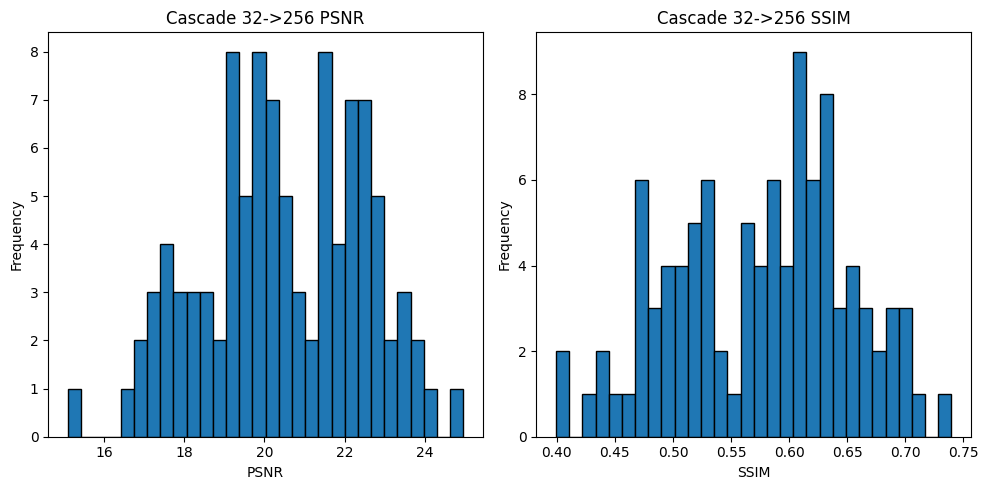

Average of psnrs in cascade 32->256 is 20.45681436538382
Stadard Deviation of psnrs in cascade 32->256 is 1.9946136130955279
Average of ssims in cascade 32->256 is 0.5754706452941338
Stadard Deviation of ssims in cascade 32->256 is 0.07663826453733927


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# generate data for histogram
# data = np.random.normal(100, 20, 1000)

# create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot the first histogram
ax[0].hist(psnrs_CC, bins=30, edgecolor='black')
ax[0].set_xlabel('PSNR')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Cascade 32->256 PSNR')

# plot the second histogram
ax[1].hist(ssims_CC, bins=30, edgecolor='black')
ax[1].set_xlabel('SSIM')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Cascade 32->256 SSIM')

# adjust spacing between subplots
fig.tight_layout()

# display plot
plt.show()
print("Average of psnrs in cascade 32->256 is", np.average(psnrs_CC))
print("Stadard Deviation of psnrs in cascade 32->256 is", np.std(psnrs_CC))
print("Average of ssims in cascade 32->256 is", np.average(ssims_CC))
print("Stadard Deviation of ssims in cascade 32->256 is", np.std(ssims_CC))

# Helper for visualizations (horizontal comparison of images)


In [ ]:
# concatenate images for original, baseline, and concatenate horizontally using cv2 and save the result
import cv2
import os
import glob
import numpy as np
